# **A. The $\beta$-method for a scalar IVP**

In [ ]:
# import all the packages here

import numpy as np
import matplotlib.pyplot as plt

import warnings


In [ ]:
A = lambda x,beta: (1+(1-beta)*x)/(1-beta*x) #def A, makes code easier to read

In [ ]:
def LinearBetaMethod(Lambda, g, tRange, u0, beta, h):

    n = int((tRange[1]-tRange[0])/h)
    tArray,solArray = np.linspace(tRange[0],tRange[1],n+1), []

    u = u0

    for i in range(n):
      solArray.append(u) #appending each point at beginning of loop

      tnext = tArray[i+1]
      t = tArray[i]
      u = A(Lambda*h,beta)*u + (h*g((1-beta)*t+beta*tnext)) / (1-beta*h*Lambda) #as in the PDF

    solArray.append(u) #appending the last point

    return tArray, solArray



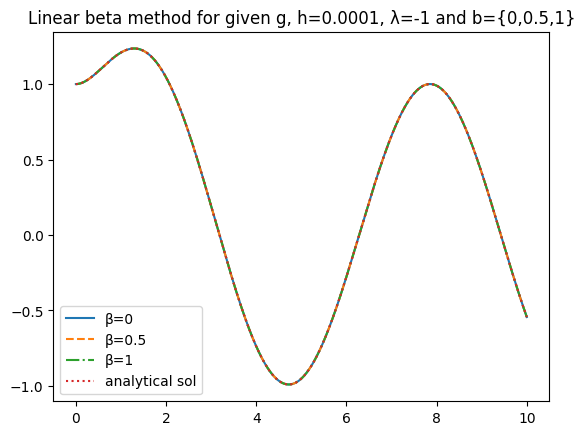

In [ ]:
Lambda = -1
beta_list = [0,0.5,1]
h = 0.0001




g = lambda x: np.cos(x) - Lambda * np.sin(x)
tRange = [0,10]
u0 = 1

linestyle = ['-','--','-.',':']

for j in range(0,3): #plotting for each beta
  t, sol = LinearBetaMethod(Lambda, g, tRange, u0, beta_list[j], h)
  plt.plot(t,sol,linestyle[j])

sol = lambda x: np.e**(Lambda*x) + np.sin(x)
plt.plot(t,sol(t),linestyle[3])
plt.title('Linear beta method for given g, h=0.0001, λ=-1 and b={0,0.5,1}')
plt.legend(['β=0','β=0.5','β=1','analytical sol'])

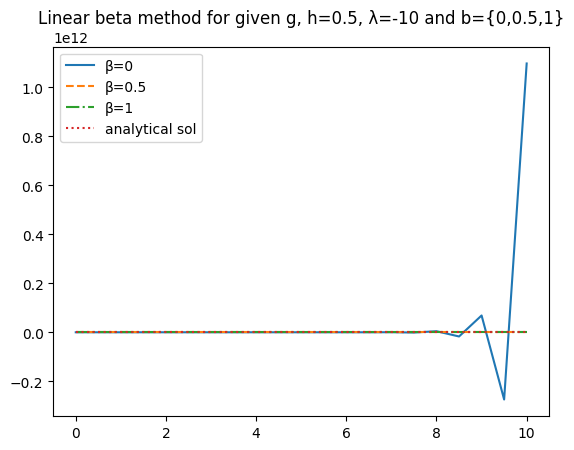

In [ ]:
## Discussion question A.1 (a)-(b)

beta_list = [0,0.5,1]
h = 0.5
Lambda=-10

g = lambda x: np.cos(x) - Lambda * np.sin(x)
tRange = [0,10]
u0 = 1

linestyle = ['-','--','-.',':']

for j in range(0,3): #plotting for each beta
  t, sol = LinearBetaMethod(Lambda, g, tRange, u0, beta_list[j], h)
  plt.plot(t,sol,linestyle[j])

sol = lambda x: np.e**(Lambda*x) + np.sin(x) #analytic sol
plt.plot(t,sol(t),linestyle[3])
plt.title('Linear beta method for given g, h=0.5, λ=-10 and b={0,0.5,1}')
plt.legend(['β=0','β=0.5','β=1','analytical sol'])

# set up the new inputs for LinearBetaMethod and the analytical solution
# for each value of h create a figure containing the analytical solution and the
# 3 numerical solutions

# REMINDER: you can directly add plots to the same figure from inside a loop


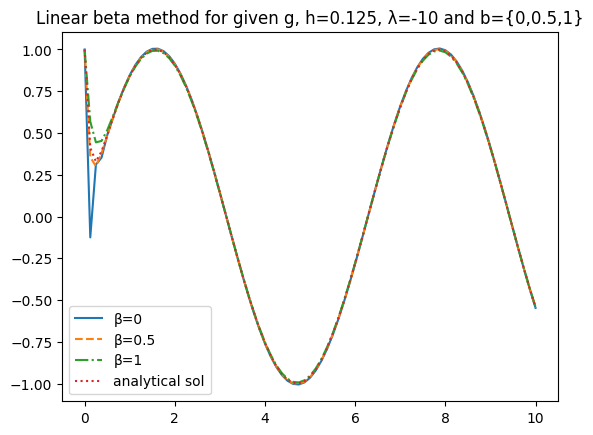

In [ ]:
beta_list = [0,0.5,1]
h = 0.125
Lambda=-10

g = lambda x: np.cos(x) - Lambda * np.sin(x)
tRange = [0,10]
u0 = 1

linestyle = ['-','--','-.',':']

for j in range(0,3): #plotting for each beta
  t, sol = LinearBetaMethod(Lambda, g, tRange, u0, beta_list[j], h)
  plt.plot(t,sol,linestyle[j])

sol = lambda x: np.e**(Lambda*x) + np.sin(x)
plt.plot(t,sol(t),linestyle[3])
plt.title('Linear beta method for given g, h=0.125, λ=-10 and b={0,0.5,1}')
plt.legend(['β=0','β=0.5','β=1','analytical sol'])


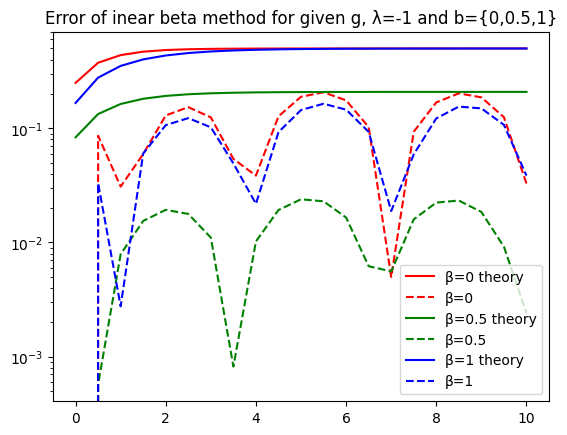

In [ ]:
## Discussion question A.2(a)

T = lambda beta,h,Lambda,n,tau: (tau/(abs(1-beta*h*Lambda))) * (1-abs(A(h*Lambda,beta))**(n+1))/(1-abs(A(h*Lambda,beta)))

beta_list = [0,0.5,1]
h = 0.5
Lambda=-1

g = lambda x: np.cos(x) - Lambda * np.sin(x)
tRange = [0,10]
u0 = 1
n=20

linestyle = ['-','--','-.',':']
cols = ['r','g','b']

analytic = lambda x: np.exp(Lambda*x) + np.sin(x)

for j in range(3):
  t, sol = LinearBetaMethod(Lambda, g, tRange, u0, beta_list[j], h)
  error = abs(sol - analytic(t)) #error

  if beta_list[j] == 0.5: #distinction for beta 0.5
    tmax = lambda h,Lambda: h**3 * (1+abs(Lambda**3)) / 24 + 3/8*h**3 * abs(Lambda) * (1+abs(Lambda)**2) #need to define tmax differently
  else:
    tmax = lambda h,Lambda: (h**2*(1+abs(Lambda**2))) / 2
  theory = [T(beta_list[j],0.5,-1,k,tmax(h,Lambda)) for k in range(21)] #theoretical error bounds
  plt.semilogy(t,theory,linestyle[0],color=cols[j])
  plt.semilogy(t,error,linestyle[1],color=cols[j])

plt.title('Error of inear beta method for given g, λ=-1 and b={0,0.5,1}')
plt.legend(['β=0 theory','β=0','β=0.5 theory','β=0.5','β=1 theory','β=1'])

The slope at β = 0 is 0.8988068706505123
The slope at β = 0.5 is 1.9171598054514105
The slope at β = 1 is 1.0144815873566146


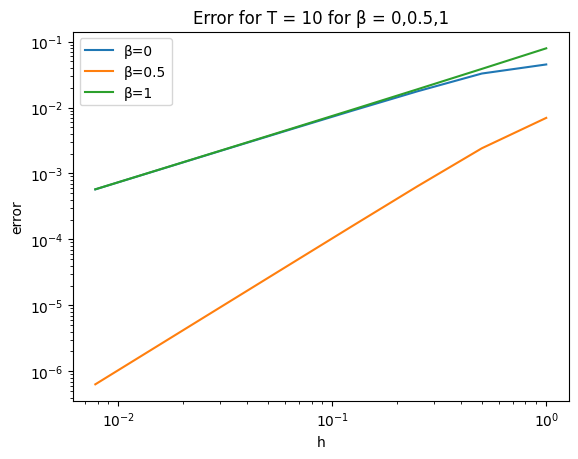

In [ ]:
## Discussion question A.2(b)

beta_list = [0,0.5,1]
Lambda=-1

g = lambda x: np.cos(x) - Lambda * np.sin(x)
analytic = lambda x: np.exp(Lambda*x) + np.sin(x)

tRange = [0,10]
u0 = 1
n=20

h_list = [2**(-l) for l in range(8)]
error_list = np.zeros((3,8))

#plotting error over h in h_list
for i in range(3):
  for j in range(8):
    a, b = LinearBetaMethod(Lambda, g, tRange, u0, beta_list[i], h_list[j])
    error_list[i][j] = abs(b[-1] - analytic(10))

for i in range(3):
    plt.loglog(h_list,error_list[i])

plt.legend(['β=0','β=0.5','β=1'])
plt.xlabel('h')
plt.ylabel('error')
plt.title('Error for T = 10 for β = 0,0.5,1')

slope = []

for i in range(3):
  slope.append((np.log(error_list[i][0]) - np.log(error_list[i][-1]))/(np.log(h_list[0])-np.log(h_list[-1])))
  print('The slope at β =',beta_list[i],'is',slope[i])


### **B. The $\beta$-method for a system of IVP**

In [ ]:
def fpIterator(phi, x0, tol=1e-8, maxit=20): ##CODE FROM 2ND PART OF COURSE

    # initialize your output variables here (x, errEst, xHist)
    x, success, errEst, xHist = x0, True, [], []
    e = 1
    i = 0

    while (e > tol) and (i < maxit):

        xHist.append(x) # updare xHist
        xprev = x
        x = phi(x) # iteration
        if isinstance(x,np.ndarray):
          if x.any() == np.Inf:
            break
        else:
          if x == np.Inf:
            break
        e = np.linalg.norm(xprev - x)
        errEst.append(e) # update errEst
        i += 1

    if (e > tol):
      success = False

    return x, success, errEst, xHist

def newton(f, df, x0, tol=1e-8, maxit=20):

    if isinstance(x0,np.ndarray):
      phi = lambda x: x - np.matmul(np.linalg.inv(df(x)),f(x))
    else:
      phi = lambda x: x - f(x)/df(x) # define iteration function
    x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)

    return x, success, errEst, xHist


In [ ]:
from logging import raiseExceptions

def BetaMethod(f, tRange, u0, df, beta, h):


    n = int((tRange[1]-tRange[0])/h)
    tArray,solArray = np.linspace(tRange[0],tRange[1],n+1), [] #initializing
    u = u0


    if isinstance(f(0,u0),float or int): #distinction to find size of I needed
      I = 1
    else:
      I = np.identity(np.shape(df(0,u0))[0])

    Bool = True #initializing boolean for if we get newton output false
    for i in range(n):

      solArray.append(u) #appending point on beginning of loop

      tnext = tArray[i+1]
      t = tArray[i]

      if beta == 0: #explicit case
        u = u + h*f(t,u)
      else: #implicit case
        R = lambda x: x - u - h*f((1-beta)*t+beta*tnext,(1-beta)*u+beta*x) #as given in PDF
        factor = lambda x: h*beta*df((1-beta)*t+beta*tnext,(1-beta)*u+beta*x)
        JR = lambda x: I - factor(x)
        a = newton(R,JR,u,1e-12,100)
        u = a[0]
        Bool = a[1]
        if a[1] is False: #we get an "false"
          warnings.warn('Newton method has failed after %d iterations (tolerance was %9.2e)\n' % (50, 1e-12))
          tArray = tArray[0:len(solArray)] #removing excess points in the tArray so it is the same length as the solArray
          break
    if Bool is True: #only if newton works do we append the last point
      solArray.append(u)

    return tArray, np.array(solArray)



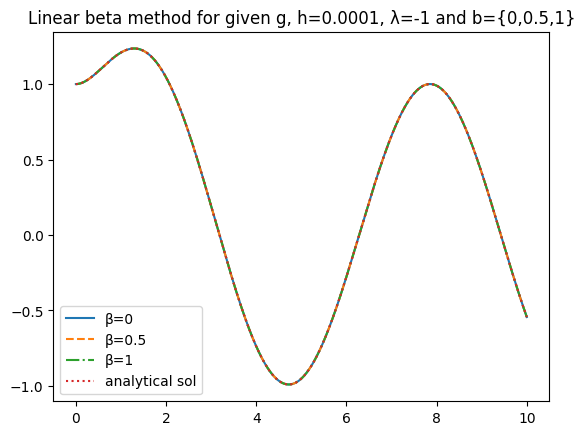

In [ ]:
##testing beta method

Lambda = -1
beta_list = [0,0.5,1]
h = 0.0001




f = lambda t,y: Lambda*(y-np.sin(t))+np.cos(t)
df = lambda t,y: Lambda
tRange = [0,10]
u0 = 1

linestyle = ['-','--','-.',':']

for j in range(3): #plotting
  t, sol = BetaMethod(f, tRange, u0, df, beta_list[j], h)
  plt.plot(t,sol,linestyle[j])

sol = lambda x: np.e**(Lambda*x) + np.sin(x) #theoretical sol
plt.plot(t,sol(t),linestyle[3])
plt.title('Linear beta method for given g, h=0.0001, λ=-1 and b={0,0.5,1}')
plt.legend(['β=0','β=0.5','β=1','analytical sol'])

In [ ]:
##testing beta method for systems, F=(f,f) where f same as previous part

Lambda = -1
beta = 0
h = 0.1




f = lambda t,y: np.array([Lambda*(y[0]-np.sin(t))+np.cos(t),Lambda*(y[1]-np.sin(t))+np.cos(t)])
df = lambda t,y: np.array([[-Lambda*np.cos(t)-np.sin(t),Lambda],[-Lambda*np.cos(t)-np.sin(t),Lambda]])
tRange = [0,10]
u0 = (1,1)

linestyle = ['-','--','-.',':']


t, sol = BetaMethod(f, tRange, u0, df, beta, h)
print(sol[-1]) #printing last point to validate output

[-0.5367302 -0.5367302]


In [ ]:
def gravAccF(x, G, M):
  g = -(G*M*x)/(np.linalg.norm(x)**3)
  return g

In [ ]:
def gravAccJac(x, G, M):
  jacG = ((G*M)/np.linalg.norm(x)**3)*(-np.identity(3)+3*(np.outer(x,x)/np.linalg.norm(x)**2))
  return jacG

<ipython-input-94-c8c3873b3966>:50: UserWarning: Newton method has failed after 50 iterations (tolerance was  1.00e-12)

  warnings.warn('Newton method has failed after %d iterations (tolerance was %9.2e)\n' % (50, 1e-12))


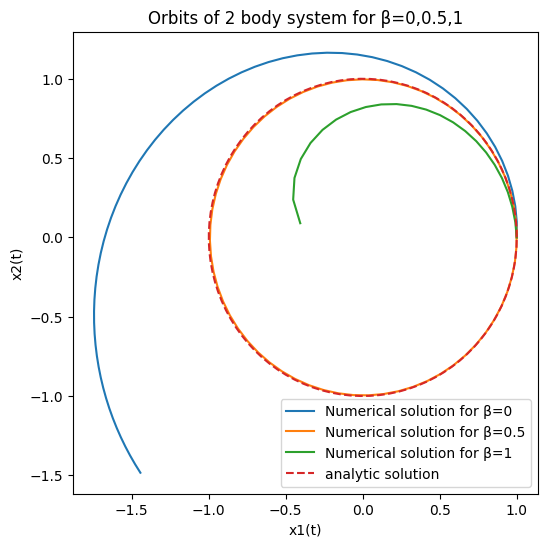

In [ ]:
## Discussion question B.1
R,M,G = 1,1,4*np.pi**2
omega = np.sqrt(G*M/R**3)
tRange = [0,2*np.pi/omega]
x0 = R*np.array([1,0,0])
v0 = R*np.array([0,omega,0])
y0 = np.block([v0,x0])
h = 2**(-6) * tRange[1]


f = lambda t,y: np.block([gravAccF(y[3:6], G, M),y[0:3]]) #as given
df = lambda t,y: np.block([[np.zeros((3,3)),gravAccJac(y[3:6], G, M)],[np.identity(3),np.zeros((3,3))]])
beta_list = [0,0.5,1]

plt.figure(figsize=(6,6))
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.title("Orbits of 2 body system for β=0,0.5,1")

for i in range(3): #plotting
  sol = BetaMethod(f,tRange,y0,df,beta_list[i],h)[1]
  plt.plot(sol[:,3],sol[:,4], label = 'Numerical solution for β={}'.format(beta_list[i]))

x_exact = lambda t: np.array([R*np.cos(omega*t),R*np.sin(omega*t),0*t]) #theoretical sol
t = np.linspace(0,2*np.pi/omega,100)
plt.plot(x_exact(t)[0],x_exact(t)[1],linestyle = '--', label = 'analytic solution')
plt.legend()



<ipython-input-94-c8c3873b3966>:50: UserWarning: Newton method has failed after 50 iterations (tolerance was  1.00e-12)

  warnings.warn('Newton method has failed after %d iterations (tolerance was %9.2e)\n' % (50, 1e-12))


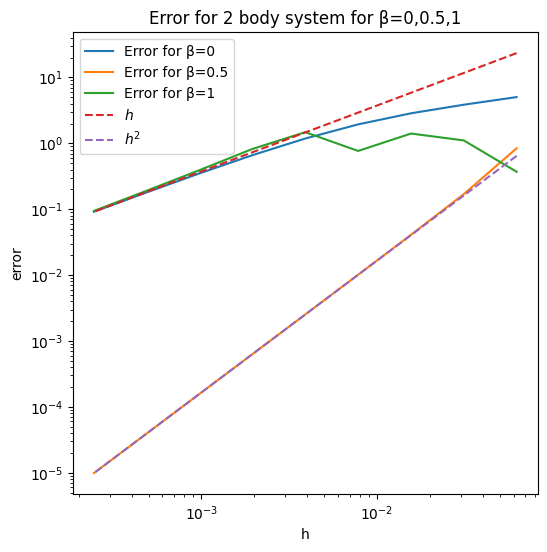

In [ ]:
## Discussion question B.2

R,M,G = 1,1,4*np.pi**2
omega = np.sqrt(G*M/R**3)
tRange = [0,2*np.pi/omega]
x0 = R*np.array([1,0,0])
v0 = R*np.array([0,2*np.pi,0])
y0 = np.block([v0,x0])

h_list = np.array([2**(-i)*tRange[1] for i in range(4,13)])

error_list = np.zeros([3,9])

x_exact = lambda t: np.array([R*np.cos(omega*t),R*np.sin(omega*t),0])
x_T = x_exact(tRange[1])

f = lambda t,y: np.block([gravAccF(y[3:6], G, M),y[0:3]])
df = lambda t,y: np.block([[np.zeros((3,3)),gravAccJac(y[3:6], G, M)],[np.identity(3),np.zeros((3,3))]])
beta_list = [0,0.5,1]

plt.figure(figsize=(6,6)) #making the size nicer
plt.xlabel("h")
plt.ylabel("error")
plt.title("Error for 2 body system for β=0,0.5,1")

for i in range(3): #plotting error over h
  for j in range(9):
    sol = BetaMethod(f,tRange,y0,df,beta_list[i],h_list[j])[1]
    error_list[i][j] = np.linalg.norm(sol[-1][3:6] - x_T)
  plt.loglog(h_list,error_list[i], label = 'Error for β={}'.format(beta_list[i]))

plt.plot(h_list,h_list/h_list[-1] * error_list[0][-1], label = '$h$', linestyle = '--') #plotting h translated up over h
x2 = lambda x: x**2
plt.plot(h_list, x2(h_list/h_list[-1]) * error_list[1][-1], label = '$h^2$', linestyle = '--') #plotting h^2 translated up over h

plt.legend()





## **Simulation of the solar system**

In [ ]:
# GIVEN DATA

# once you run this cell, data do not need to be redefined afterwards

# bodyData >>> dictionary
# planet_name : [[position], [velocity], mass, radius]
bodyData = {'Sun':     [[-0.001970535866989,0.006992528613755,0.003003353286460],     [-0.003060516548058,9.766503215911289e-05,1.285769889353954e-04], 1.,                    0.004645788049977    ],
            'Mercury': [[-0.103750564753643,0.265872999389654,0.151845741595397],     [-11.786488212332412,-3.043816938682143,-0.404437018499995],      1.660100000000000e-07, 1.631039257833501e-05],
            'Venus':   [[0.690679248097975,0.216272706068898,0.053342373520349],      [-2.191009617045287,6.362618945084622,3.001392241820023],         2.447838300000000e-06, 4.045512126396863e-05],
            'Earth':   [[-0.390407827983219,-0.851914518842311,-0.369327622703087],   [5.699180080971290,-2.233434088853574,-0.968082733568435],        3.003489596320000e-06, 4.263429666582815e-05],
            'Moon':    [[-0.387769495725030,-0.851521423704295,-0.369414334068375],   [5.665513423756666,-2.044803028185879,-0.889439117880211],        3.694303706838754e-08, 1.161781241850256e-05],
            'Mars':    [[-0.737647142329740,1.319523618250907,0.624881276054329],     [-4.369234120273118,-1.747768808918232,-0.683735132118248],       3.227151000000000e-07, 2.270754245434591e-05],
            'Jupiter': [[-1.083725767182327,-4.774617596156765,-2.020193717119794],   [2.664581611056880,-0.373809177417589,-0.225076986037626],        9.547919399999999e-04, 4.778945025452157e-04],
            'Saturn':  [[2.717966807444090,-8.895476170824110,-3.791336560161174],    [1.849168547433158,0.533174622083356,0.140593650870695],          2.858860000000000e-04, 4.028666966848747e-04],
            'Uranus':  [[16.702835279475660,9.904620456544170,4.101720437757826],     [-0.786425398309071,1.042085220791517,0.467526827197142],         4.366243999999999e-05, 1.708513622580592e-04],
            'Neptune': [[29.091455715025140,-6.237643073996448,-3.277367855295219],   [0.261580139664187,1.040386341187902,0.419323757516277],          5.151389000000000e-05, 1.655504846701003e-04],
            'Pluto':   [[12.326835909722869,-28.796445349285797,-12.700526363474438], [1.093172334249140,0.294046564794999,-0.237609365630783],         7.396000000000000e-09, 7.687275190608712e-06]}

# bodyMass >>> mass array
bodyMass = np.array([planet[2] for planet in bodyData.values()])

# radius
radius = np.array([planet[-1] for planet in bodyData.values()])

# velAndPos >>> each row contains velocity and position components
velAndPos = np.zeros((11,6))
planet_data = bodyData.values()
i = 0
for planet in planet_data:
    velAndPos[i, 0] = planet[1][0]
    velAndPos[i, 1] = planet[1][1]
    velAndPos[i, 2] = planet[1][2]
    velAndPos[i, 3] = planet[0][0]
    velAndPos[i, 4] = planet[0][1]
    velAndPos[i, 5] = planet[0][2]
    i += 1


In [ ]:
def nBodyF(t, solVec, mass = bodyMass):
    G = 4*np.pi**2
    solVec = np.reshape(solVec,(11,6))
    g = lambda x,M: -(G*M*x)/(np.linalg.norm(x)**3)

    f= np.array([])

    for i in range(11):
      sum = np.zeros(3)
      for j in range(11):
        if i != j:
          sum += g(solVec[i][3:6]-solVec[j][3:6],mass[j])
      f = np.append(f,sum)
      f = np.append(f,solVec[i][0:3])

    return f

In [ ]:
# Jacobian matrix of the rhs of the N-body problem
# N-body simulation has been non-dimensionalized

# INPUT
# t             current time level
# solVec        current solution vector (size 1 x (6 * N))
# mass          array with mass of each body (1 x N)
#
# OUTPUT
# jacF          Jacobian matrix of rhs of N-body system (size 6*N x 6*N)

def nBodyJac(t, solVec, mass = bodyMass):
    G = 4*np.pi**2
    jacF=np.identity(66)
    sols = np.reshape(solVec,(11,6))

    for i in range(11):
      for j in range(11):
        if i != j:
          jac_block = np.block([[np.zeros((3,3)),gravAccJac(sols[i][3:6]-sols[j][3:6], G, mass[j])],[np.identity(3),np.zeros((3,3))]]) #put regularly appearing blocks in right positions
          jacF[6*i:6*i+6,6*j:6*j+6] = jac_block

    return jacF

In [ ]:
# GIVEN FUNCTION

# Simulation of precomputed orbits of celestial bodies
# INPUT
# tArray        1 x Nt array containing the time points
# solArray      (6 N) x Nt array containing the velocities and positions of N bodies
# bodyData      auxilliary data structure

# ------------------------------------------------------------------------------
# define some auxiliary functions
def rangePos(idx):
    idxRange = np.arange((6 * (idx - 1) + 4), 6 * idx +1)
    return idxRange

def nBodyAngularMomentum(solArray, mass):
    N = len(mass)
    solVec = np.reshape(solArray, (N, 6))
    centerOfMass = np.zeros(3)
    for bdx in range(1, N+1):
        centerOfMass += solVec[bdx-1, 3 : 6]*mass[bdx-1]
    centerOfMass = centerOfMass / np.sum(mass)
    angMom = np.zeros((N,3))
    for bdx in range(1,N+1):
        angMom[bdx-1,:] = mass[bdx-1] * np.cross(solVec[bdx-1, 3:6] - centerOfMass, solVec[bdx-1, 0:3])

    return angMom

# ------------------------------------------------------------------------------

def simulateSolarSystem(tArray, solArray, bodyData):
    N = len(bodyData)
    angularMomInit = np.sum(nBodyAngularMomentum(solArray[0,:], mass), 0)
    direction3 = angularMomInit / np.linalg.norm(angularMomInit)
    direction1 = np.zeros(len(direction3))
    cdx = np.where(direction3 == np.abs(direction3).min())[0][0]
    direction1[cdx] = 1.
    direction1 = direction1 - np.matmul(direction1, direction3) * direction3
    direction1 = direction1 / np.linalg.norm(direction1)
    direction2 = np.cross(direction3, direction1)

    projPos = []
    for bdx in range(1,N+1):
        A = np.matmul(solArray[:, rangePos(bdx)-1],direction1)
        B = np.matmul(solArray[:, rangePos(bdx)-1],direction2)
        projPos.append( np.array([[A][0], [B][0]]) )

    cMap =[[       0,    0.4470,    0.7410],
        [  0.8500,    0.3250,    0.0980],
        [  0.9290,    0.6940,    0.1250],
        [  0.4940,    0.1840,    0.5560],
        [  0.4660,    0.6740,    0.1880],
        [  0.3010,    0.7450,    0.9330],
        [  0.6350,    0.0780,    0.1840],
        [  0.7263,    0.3085,    0.3880],
        [  0.8175,    0.5390,    0.5920],
        [  0.9087,    0.7695,    0.7960],
        [  1.0000,    1.0000,    1.0000]]

    fig = plt.figure(figsize=(17,7.5))
    planetname = list(bodyData.keys())

    for bdx in range(N):
        mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
        plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
        if beta == 1.:
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        else:
            plt.plot(projPos[bdx][0,-1], projPos[bdx][1,-1], '.', color=cMap[bdx], markersize=mrk_size)

    ax = plt.gca()
    ax.set_facecolor('k')
    plt.legend(loc='lower right')
    plt.xlim([-6.,6.])
    plt.ylim([-2.5,2.5])
    plt.title('Orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
    plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
    plt.show()

    if beta == 1.0:
        print('--------------------------------------------------------------------------------------------------------------------------')
        plt.figure(figsize=(17,7.5))
        for bdx in range(N):
            mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
            plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        ax = plt.gca()
        ax.set_facecolor('k')
        plt.legend(loc='lower right')
        plt.xlim([-0.25, -0.04])
        plt.ylim([-1.05, -0.95])
        plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
        plt.title('Earth and Moon orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
        plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    # Compute and plot angular momentum
    ts = len(tArray) # time steps
    angMomArray = np.zeros( (ts,N) )
    for tdx in range(0,ts):
        value = nBodyAngularMomentum(solArray[tdx, :], mass)
        angMomArray[tdx, :] = np.matmul( direction3, np.transpose(value) )

    angMomArray = np.transpose(angMomArray)
    angMomBdx = [3, 4] # indices of Earth and Moon

    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomArray[angMomBdx[0],:]-angMomArray[angMomBdx[0],0], color=cMap[3])
    plt.plot(tArray, angMomArray[angMomBdx[1],:]-angMomArray[angMomBdx[1],0], color=cMap[4])
    if beta == 1.:
        plt.plot(tArray[-2], angMomArray[angMomBdx[0],-2]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-2], angMomArray[angMomBdx[1],-2]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    else:
        plt.plot(tArray[-1], angMomArray[angMomBdx[0],-1]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-1], angMomArray[angMomBdx[1],-1]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    plt.title('Increase in angular momentum of Earth and Moon', fontsize=16)
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$L^b_0(t) - L^b_0(0)$')
    plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    angMom = np.sum(angMomArray, axis=0)
    angMomErr = angMom - angMom[0]
    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomErr, 'k-')
    if beta == 1.:
        plt.plot(tArray[-2], angMomErr[-2], 'ok', markersize=10, markerfacecolor='red')
    else:
        plt.plot(tArray[-1], angMomErr[-1], 'ok', markersize=10, markerfacecolor='red')
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$\\sum^N_{b=1} (L^b_0(t) - L^b_0(0))$')
    plt.title('Error in total angular momentum', fontsize=16)
    plt.show()




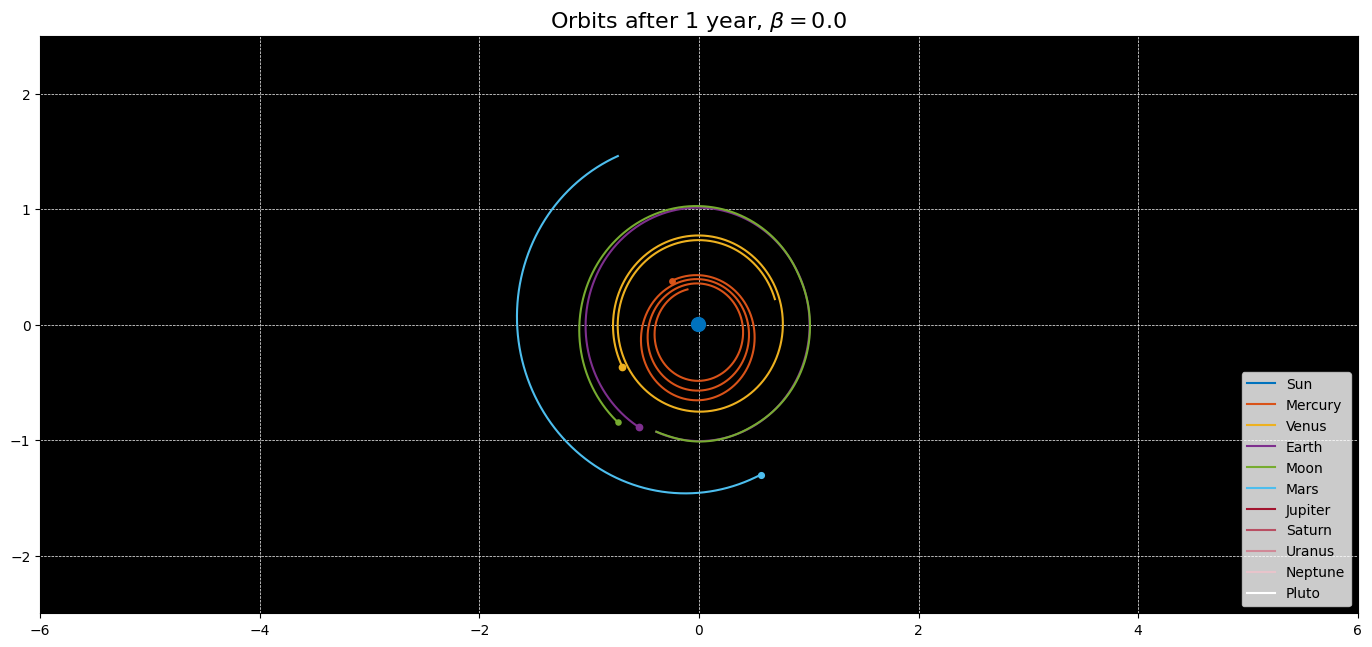

--------------------------------------------------------------------------------------------------------------------------


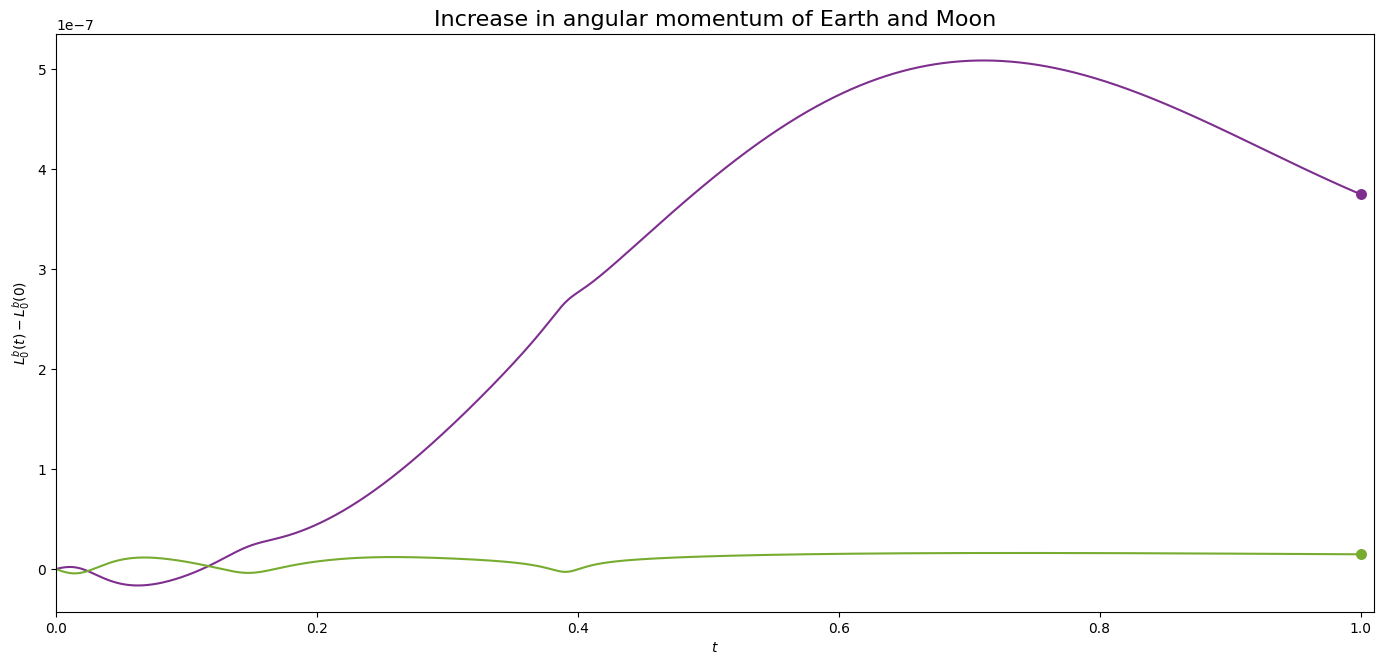

--------------------------------------------------------------------------------------------------------------------------


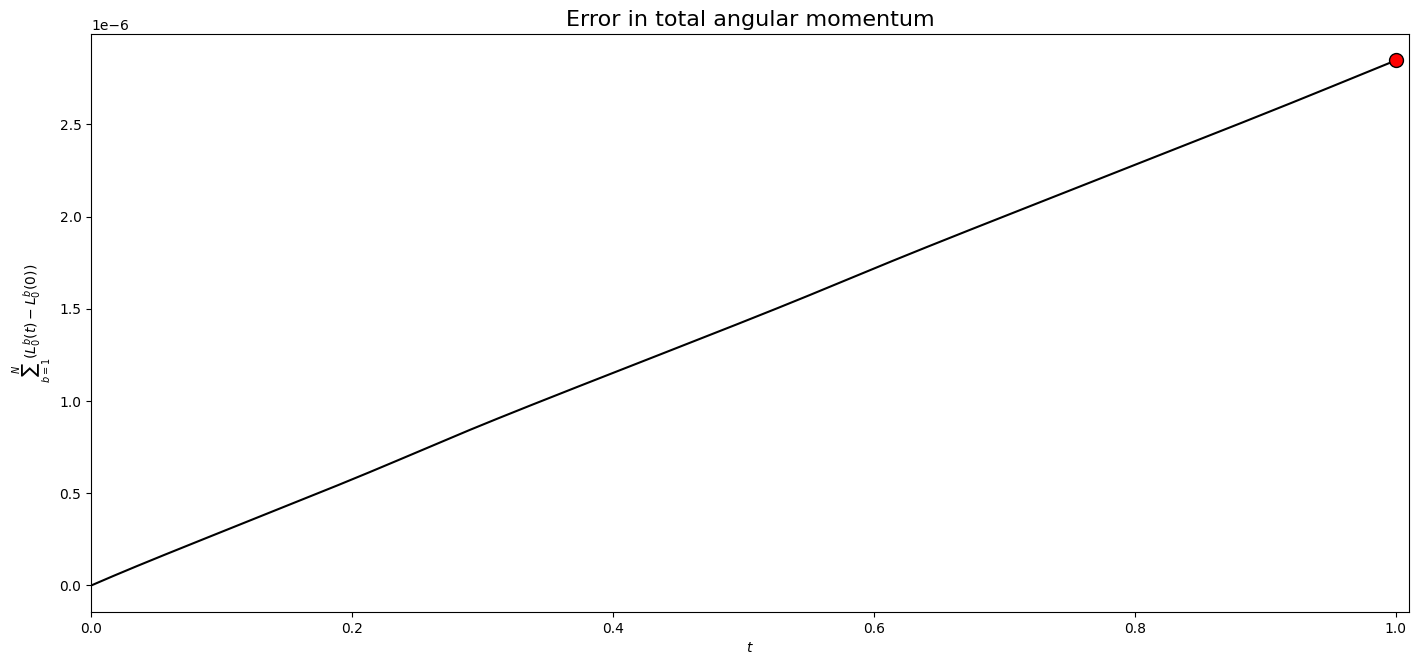

KeyboardInterrupt: ignored

In [ ]:
R,M,G = 1,1,4*np.pi**2
tRange = [0,1]
y0 = np.reshape(velAndPos,(66))
h = 1/(6*365.25)

beta_list = [0,0.5,1]

mass = bodyMass #again to make everything work correctly


for i in range(0,3): #plotting each simulation
  beta = beta_list[i] #as we need 'beta' to update it for simulatesolarsystem to work correctly
  t, sol = BetaMethod(nBodyF,tRange,y0,nBodyJac,beta_list[i],h)
  simulateSolarSystem(t, sol, bodyData)


In [ ]:
import datetime as dt

def Time2String(tStar):
    startDate = dt.datetime(2019, 5, 27, 9, 0, 0) # datetime(y, m, d, h, m, s)
    convDate = startDate.timestamp()

    eclipseTimeInSeconds = (365.25 * 24 * 3600) * tStar

    addToDate = convDate + eclipseTimeInSeconds
    newDate = dt.datetime.fromtimestamp(addToDate)

    date = newDate.strftime("%c")

    return date


In [ ]:
def findLocalMaxima(xVals, yVals):
  xMax = []
  yMax = []
  for i in range(len(yVals)-2):
    y0 = yVals[i]
    y1 = yVals[i+1]
    y2 = yVals[i+2]

    if (y0 < y1) and (y1 > y2):
      x_vec = xVals[i:i+3]
      y_vec = yVals[i:i+3]
      coeffs = np.polyfit(x_vec,y_vec,2) #least squares approx

      f = lambda x: coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

      argmax = -coeffs[1]/(2*coeffs[0]) #finds zeros of derivative of f, which are always maxima

      xMax.append(argmax)
      yMax.append(f(argmax))


  return xMax, yMax

In [ ]:
R,M,G = 1,1,4*np.pi**2 ##RUNNING FOR 3 YEAR h=2 HOURS
tRange = [0,3]
y0 = np.reshape(velAndPos,(66))
h = 2/(24*365.25)

beta = 0.5

mass = bodyMass
tVals, xVals = BetaMethod(nBodyF,tRange,y0,nBodyJac,beta,h)

In [ ]:
## Discussion question B.4
x4 = xVals[:,21:24]
x5 = xVals[:,27:30]
x1 = xVals[:,3:6]

alphaVals = np.zeros(len(tVals))

for i in range(len(tVals)-1):
  t_sol = xVals[i,:]
  x4 = t_sol[21:24]
  x5 = t_sol[27:30]
  x1 = t_sol[3:6]
  d_ME = x5 - x4
  d_MS = x5 - x1
  alphaVals[i]=np.dot(d_MS,d_ME)/(np.linalg.norm(d_MS)*np.linalg.norm(d_ME))


print(len(xVals))

negaVals = -alphaVals #to find minima we just negate our values to make them maxima


maxima = findLocalMaxima(tVals, alphaVals) #find maxima usinng vals
minima = findLocalMaxima(tVals, -alphaVals) #minima using negated vals

solar_eclipse_time = []

for i in range(len(minima[0])-1):
  if abs(minima[1][i] - 1) < 3e-4: #as we negated our points we do minima-1 instead of 1-minima
    print('Predicted solar eclipse at {}'.format(Time2String(minima[0][i])))

for i in range(len(maxima[0])-1):
  if abs(maxima[1][i] - 1) < 3e-4:
    print('Predicted lunar eclipse at {}'.format(Time2String(maxima[0][i])))
